# Neurons example, pt. 2: large datasets

In [1]:
import numpyro
from bayes_window import models, fake_spikes_explore, BayesWindow
from bayes_window.generative_models import generate_fake_spikes
import numpy as np
from importlib import reload
import altair as alt
alt.data_transformers.disable_max_rows()

try:
    alt.renderers.enable('altair_saver', fmts=['png'])
except Exception:
    pass

In [2]:

df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=20,
                                                                n_neurons=6,
                                                                n_mice=3,
                                                                dur=5,
                                                               mouse_response_slope=40,
                                                               overall_stim_response_strength=5)


## Two-step

## Each neuron separately
### 1. Firing rate

In [20]:
from tqdm import tqdm

import bayes_window as baw
from bayes_window import workflow, fitting
reload(workflow)
reload(fitting)
gb='neuron_x_mouse'
step1_res=[]
for i, df_m_n in tqdm(df_monster.groupby(gb)):
    bw1 = workflow.BayesWindow(df_m_n, y='isi',treatment='stim', condition=['i_trial'], group='mouse'
                     ).fit_conditions(dist_y='gamma',
                                      fit_fn=fitting.fit_svi)
    posterior=bw1.posterior['mu_per_condition'].copy()
    posterior[gb] = i
    step1_res.append(posterior)

  0%|          | 0/18 [00:00<?, ?it/s]

  6%|▌         | 1/18 [00:05<01:25,  5.02s/it]

 11%|█         | 2/18 [00:10<01:25,  5.31s/it]

 17%|█▋        | 3/18 [00:16<01:21,  5.45s/it]

 22%|██▏       | 4/18 [00:22<01:20,  5.73s/it]

 28%|██▊       | 5/18 [00:28<01:18,  6.03s/it]

 33%|███▎      | 6/18 [00:35<01:15,  6.26s/it]

 39%|███▉      | 7/18 [00:42<01:11,  6.51s/it]

 44%|████▍     | 8/18 [00:49<01:05,  6.51s/it]

 50%|█████     | 9/18 [00:55<00:58,  6.48s/it]

 56%|█████▌    | 10/18 [01:02<00:52,  6.57s/it]

 61%|██████    | 11/18 [01:08<00:46,  6.60s/it]

 67%|██████▋   | 12/18 [01:15<00:39,  6.66s/it]

 72%|███████▏  | 13/18 [01:24<00:36,  7.23s/it]

 78%|███████▊  | 14/18 [01:32<00:29,  7.42s/it]

 83%|████████▎ | 15/18 [01:39<00:22,  7.42s/it]

 89%|████████▉ | 16/18 [01:47<00:15,  7.53s/it]

 94%|█████████▍| 17/18 [01:54<00:07,  7.33s/it]

100%|██████████| 18/18 [02:01<00:00,  6.73s/it]


### 2. Regression
TODO add sigma to step 2 inputs


n(Divergences) = 86
non-unique mouse in:       mouse
0   m0bayes
0   m0bayes
0   m0bayes
0   m0bayes
0   m0bayes
..      ...
39  m2bayes
39  m2bayes
39  m2bayes
39  m2bayes
39  m2bayes

[4320 rows x 1 columns]
True neuron_x_mouse:O


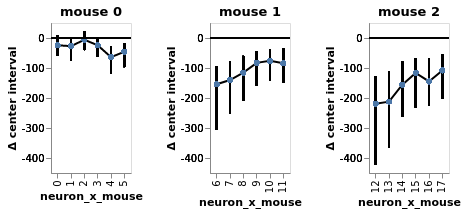

In [21]:
import pandas as pd
bw2 = BayesWindow(pd.concat(step1_res),
                 y='center interval', treatment='stim', condition=['neuron_x_mouse'], group='mouse',
                  detail='i_trial')
bw2.fit_slopes(model=(models.model_hierarchical),
              do_make_change='subtract',
              dist_y='student',
              robust_slopes=True,
              add_group_intercept=True,
              add_group_slope=False)
bw2.chart

non-unique mouse in:       mouse
0   m0bayes
0   m0bayes
0   m0bayes
0   m0bayes
0   m0bayes
..      ...
39  m2bayes
39  m2bayes
39  m2bayes
39  m2bayes
39  m2bayes

[4320 rows x 1 columns]
True neuron_x_mouse:O


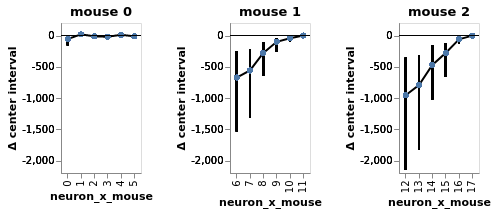

## Packaged version 1
Separate levels

  0%|          | 0/18 [00:00<?, ?it/s]

  6%|▌         | 1/18 [00:14<04:06, 14.48s/it]

n(Divergences) = 1


 11%|█         | 2/18 [00:32<04:23, 16.49s/it]

n(Divergences) = 1


 17%|█▋        | 3/18 [00:50<04:18, 17.23s/it]

 22%|██▏       | 4/18 [01:10<04:15, 18.22s/it]

n(Divergences) = 37


 28%|██▊       | 5/18 [01:32<04:15, 19.64s/it]

 33%|███▎      | 6/18 [01:51<03:55, 19.59s/it]

 39%|███▉      | 7/18 [02:09<03:29, 19.07s/it]

 44%|████▍     | 8/18 [02:26<03:02, 18.21s/it]

 50%|█████     | 9/18 [02:42<02:37, 17.48s/it]

 56%|█████▌    | 10/18 [02:58<02:17, 17.14s/it]

n(Divergences) = 31


 61%|██████    | 11/18 [03:22<02:14, 19.15s/it]

n(Divergences) = 2


 67%|██████▋   | 12/18 [03:43<01:58, 19.77s/it]

 72%|███████▏  | 13/18 [04:05<01:42, 20.54s/it]

 78%|███████▊  | 14/18 [04:25<01:21, 20.33s/it]

 83%|████████▎ | 15/18 [04:43<00:58, 19.64s/it]

 89%|████████▉ | 16/18 [04:59<00:36, 18.49s/it]

 94%|█████████▍| 17/18 [05:16<00:18, 18.09s/it]

n(Divergences) = 101


100%|██████████| 18/18 [05:41<00:00, 18.96s/it]


non-unique mouse in:     mouse
0     0.0
0     0.0
0     0.0
0     0.0
0     0.0
..    ...
39    2.0
39    2.0
39    2.0
39    2.0
39    2.0

[4320 rows x 1 columns]
True neuron_x_mouse:O


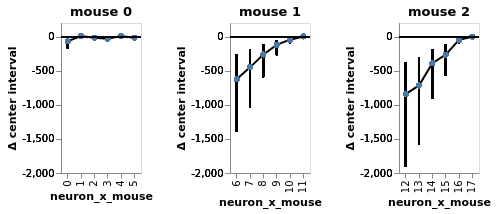

In [5]:
from bayes_window import workflow
reload(workflow)
bw = workflow.BayesWindow(df_monster, y='isi',treatment='stim', condition=['neuron_x_mouse'], 
                          group='mouse', detail='i_trial')
bw=bw.fit_twostep_by_group(dist_y_step_one='gamma', dist_y='student',
              robust_slopes=True,
              add_group_intercept=True,
              add_group_slope=False)

bw.chart

## Packaged version 2
All levels together

In [5]:
bw = BayesWindow(df_monster, y='isi',treatment='stim', condition=['neuron_x_mouse'], group='mouse', detail='i_trial')
bw=bw.fit_twostep(dist_y_step_one='gamma', dist_y='student')

n(Divergences) = 11


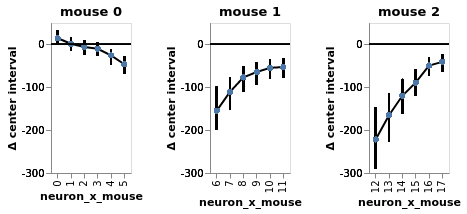

In [6]:
bw.chart

## Step by step

### 1. Firing rate

In [4]:
bw1 = BayesWindow(df_monster, y='isi',treatment='stim', condition=['neuron_x_mouse','i_trial'], group='mouse')
bw1.fit_conditions(dist_y='gamma')
# bw.plot_model_quality()

### 2. Regression

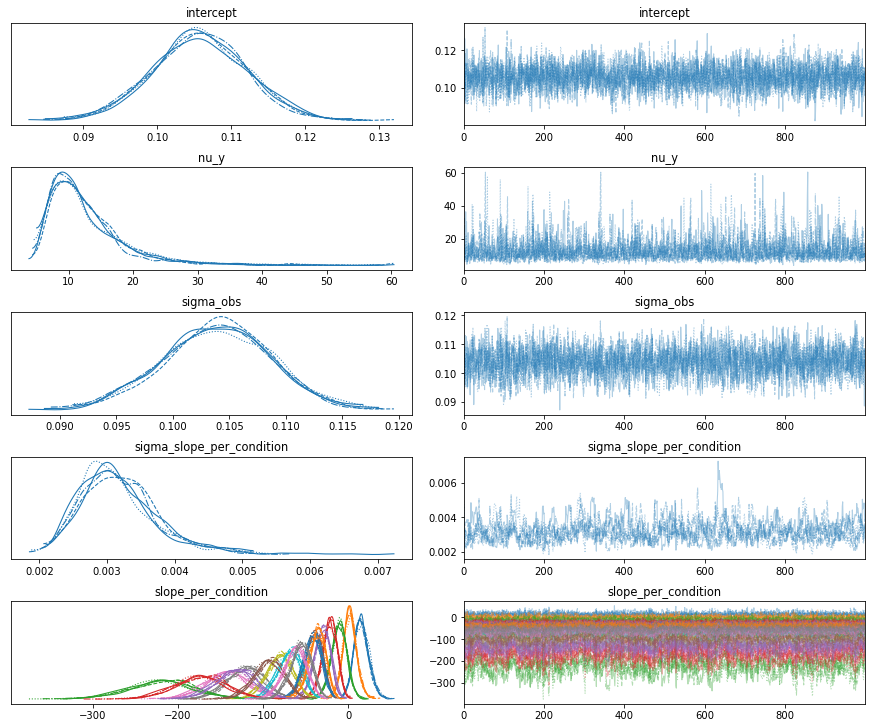

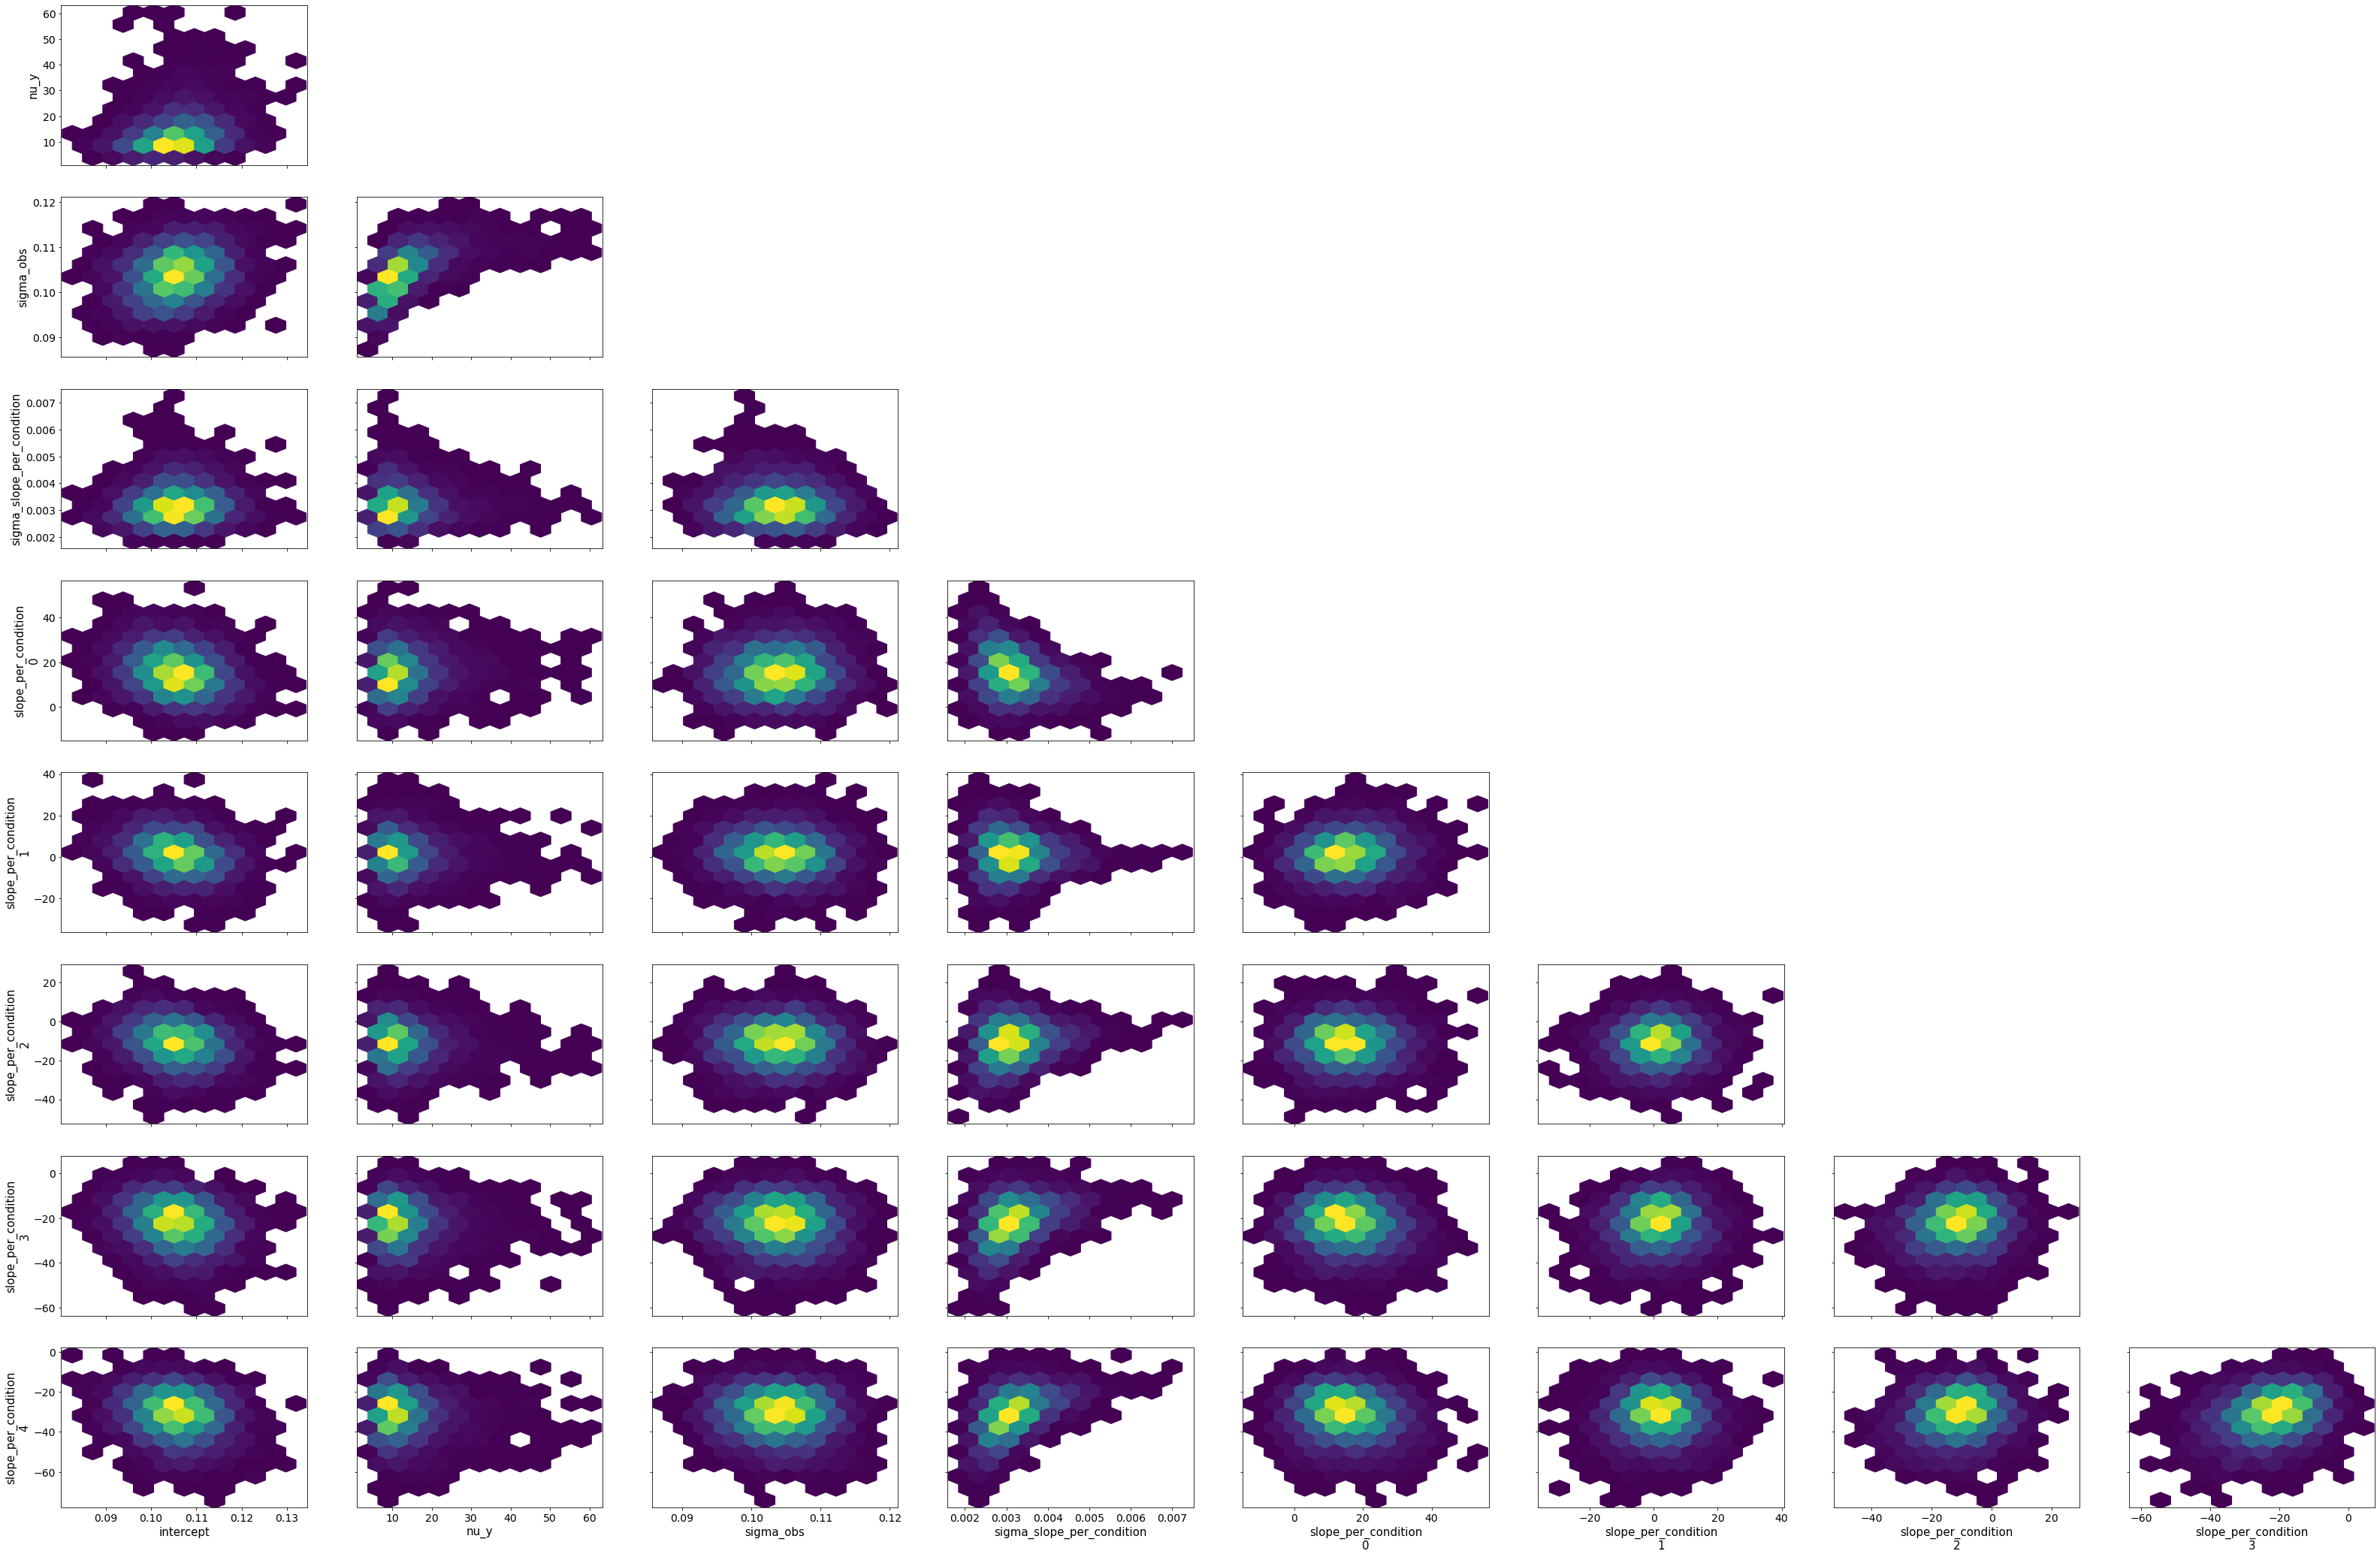

In [5]:
bw2 = BayesWindow(bw1.posterior['mu_per_condition'],
                 y='center interval', treatment='stim', condition=['neuron_x_mouse'], group='mouse')
bw2.fit_slopes(model=(models.model_hierarchical),
              do_make_change='subtract',
              dist_y='student',
              robust_slopes=False,
              add_group_intercept=False,
              add_group_slope=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron_x_mouse'))

bw2.plot_model_quality()

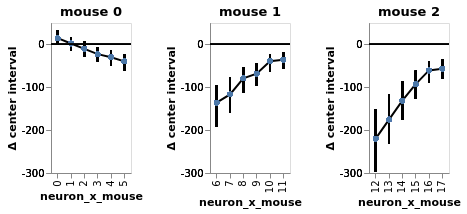

In [6]:
bw2.chart


## NUTS GLM

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

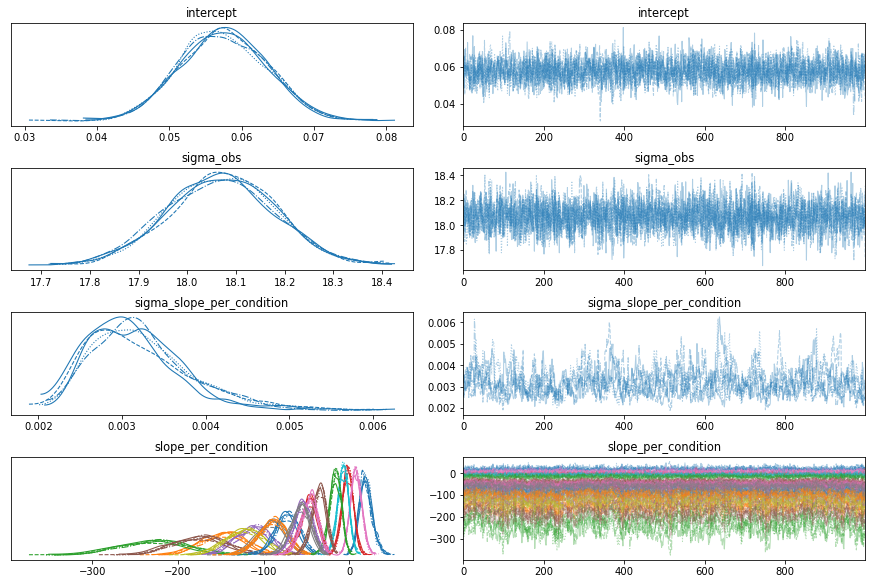

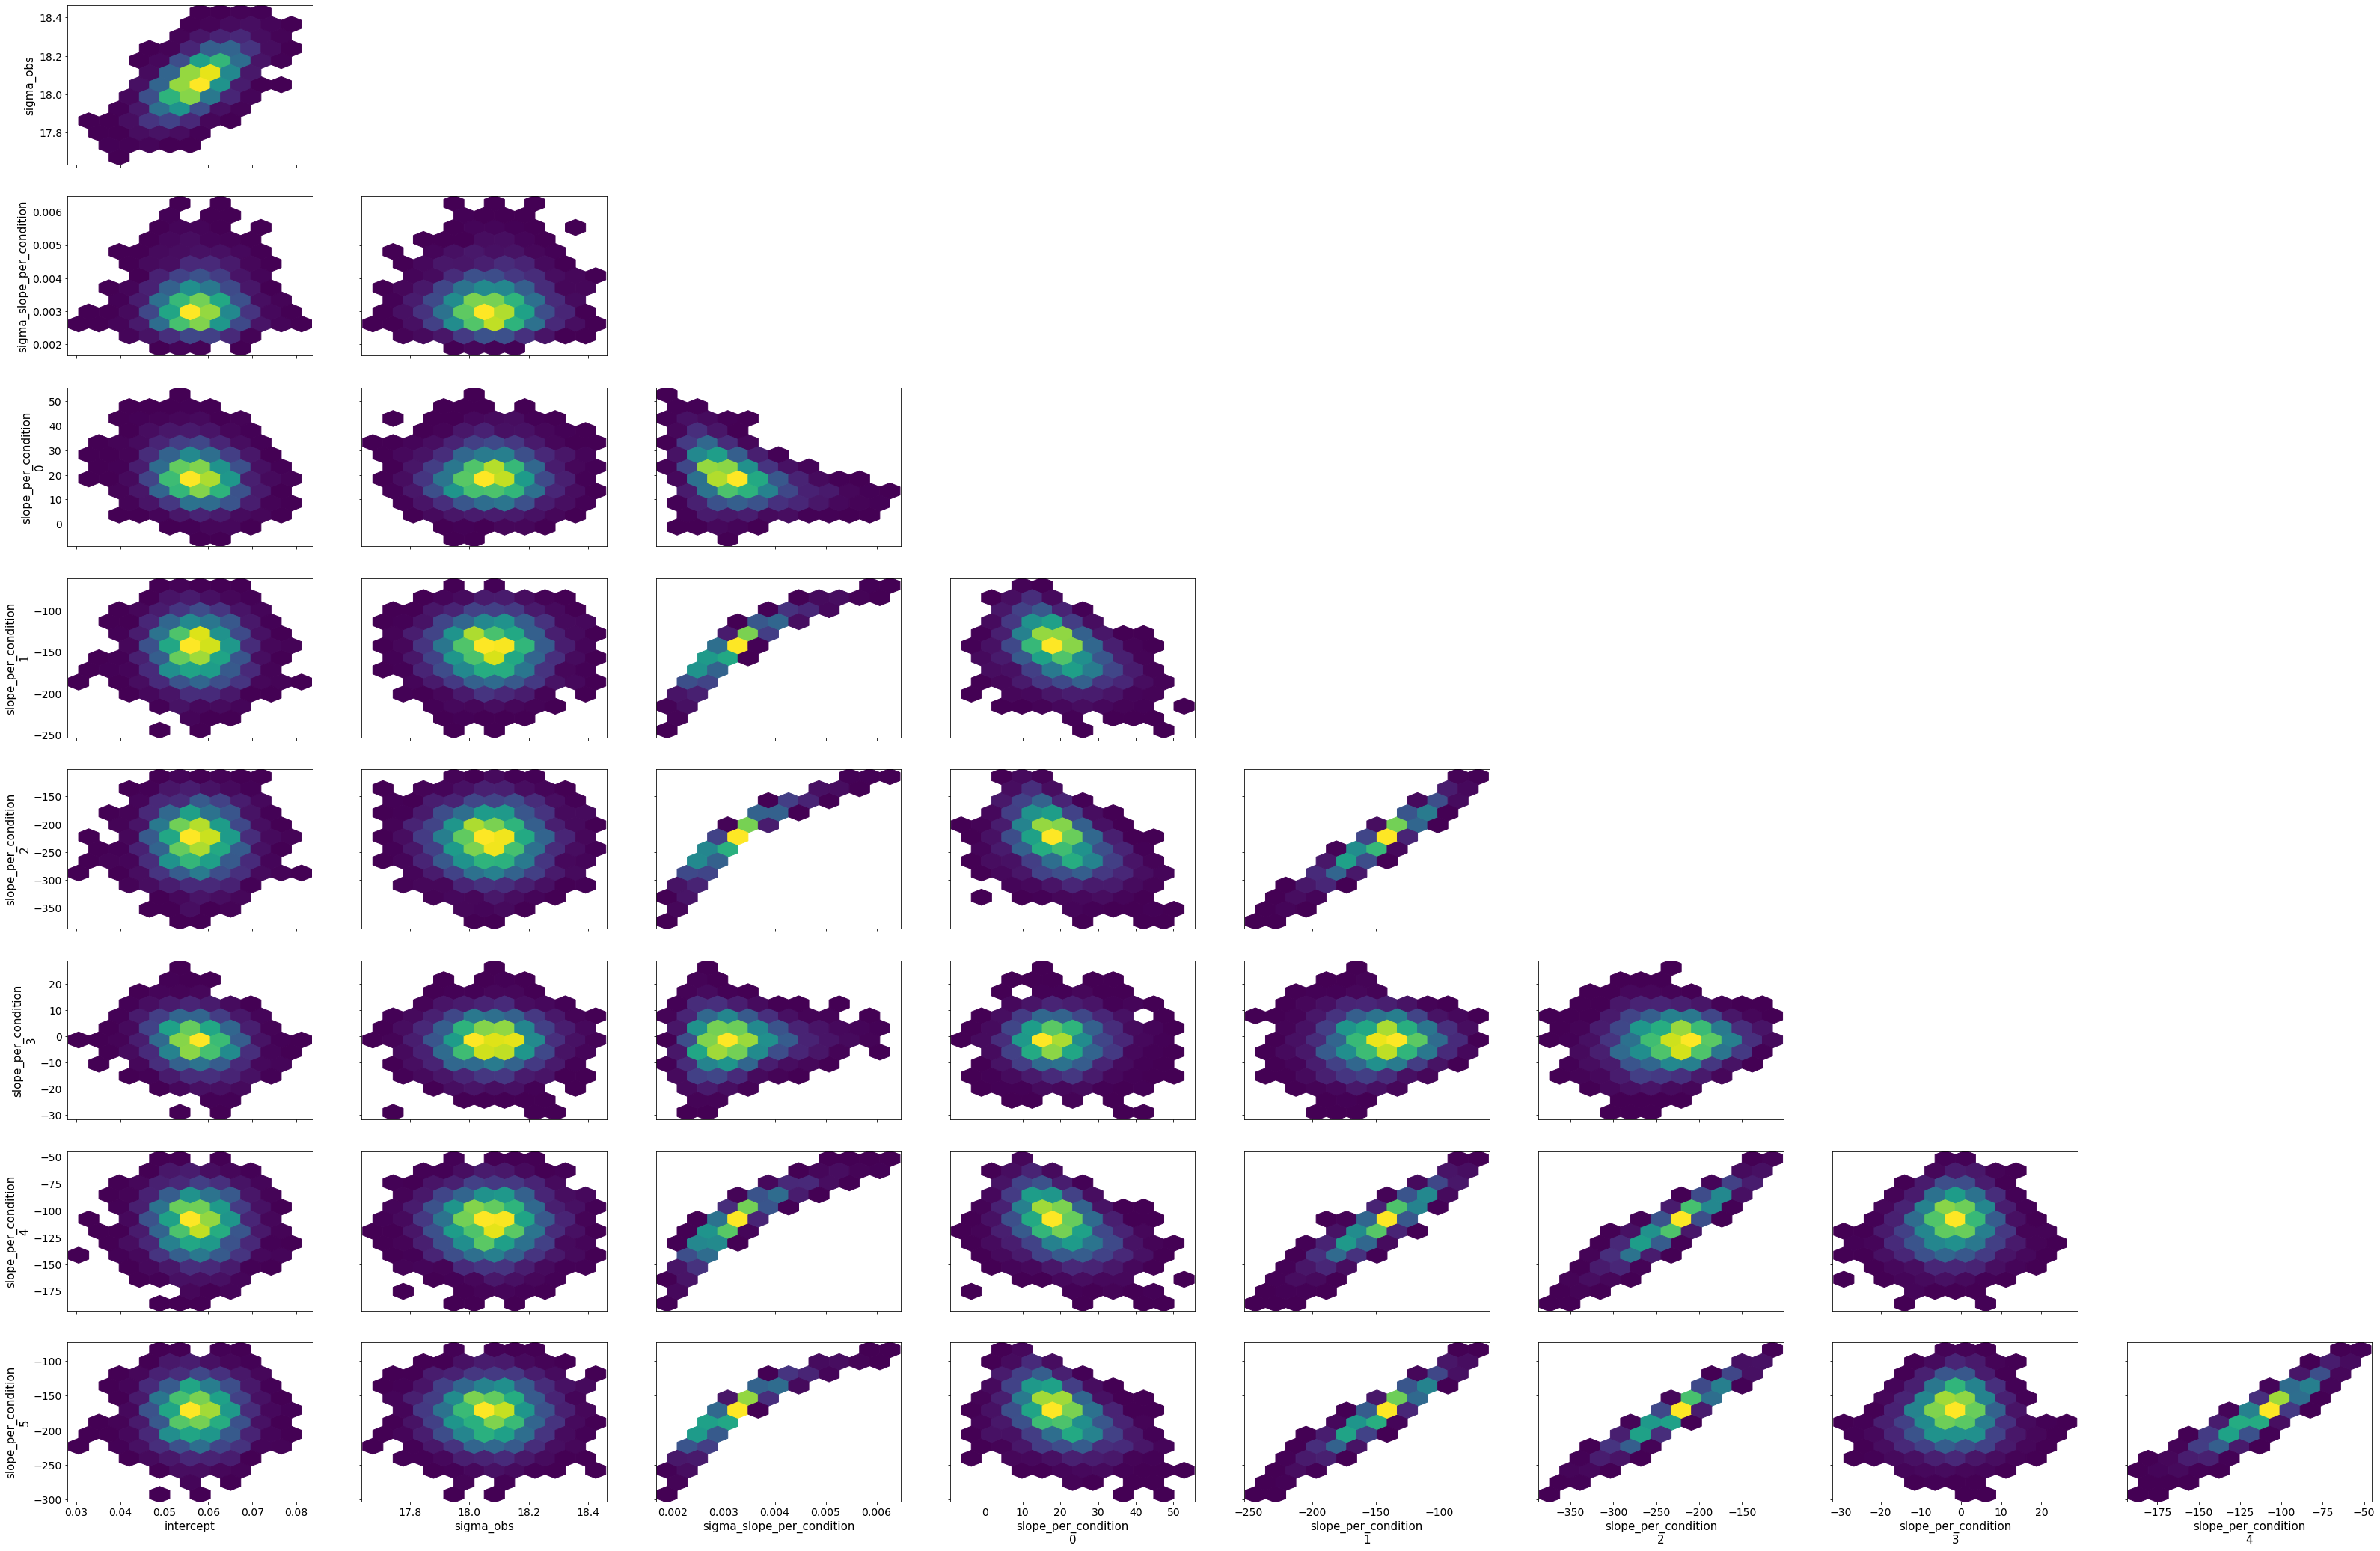

In [22]:
# Gamma GLM
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=(models.model_hierarchical),
              progress_bar=True,
              do_make_change='subtract',
              dist_y='gamma',
              robust_slopes=False,
              add_group_intercept=False,
              add_group_slope=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot_model_quality()

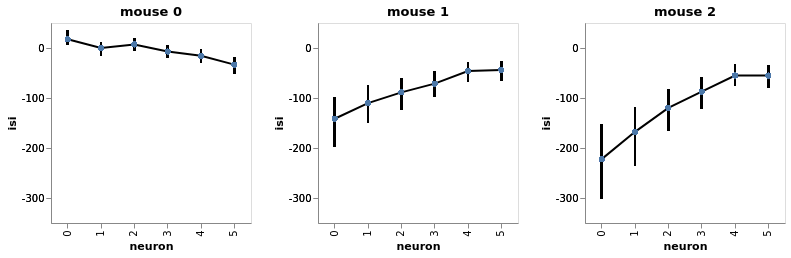

In [23]:
import altair as alt
alt.data_transformers.disable_max_rows()
bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

## NUTS student

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

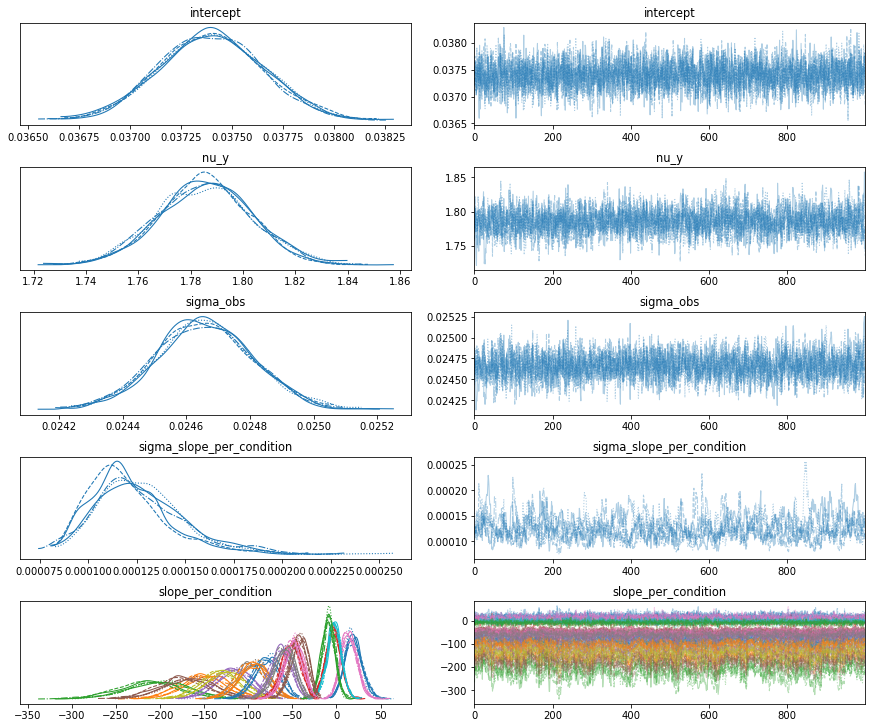

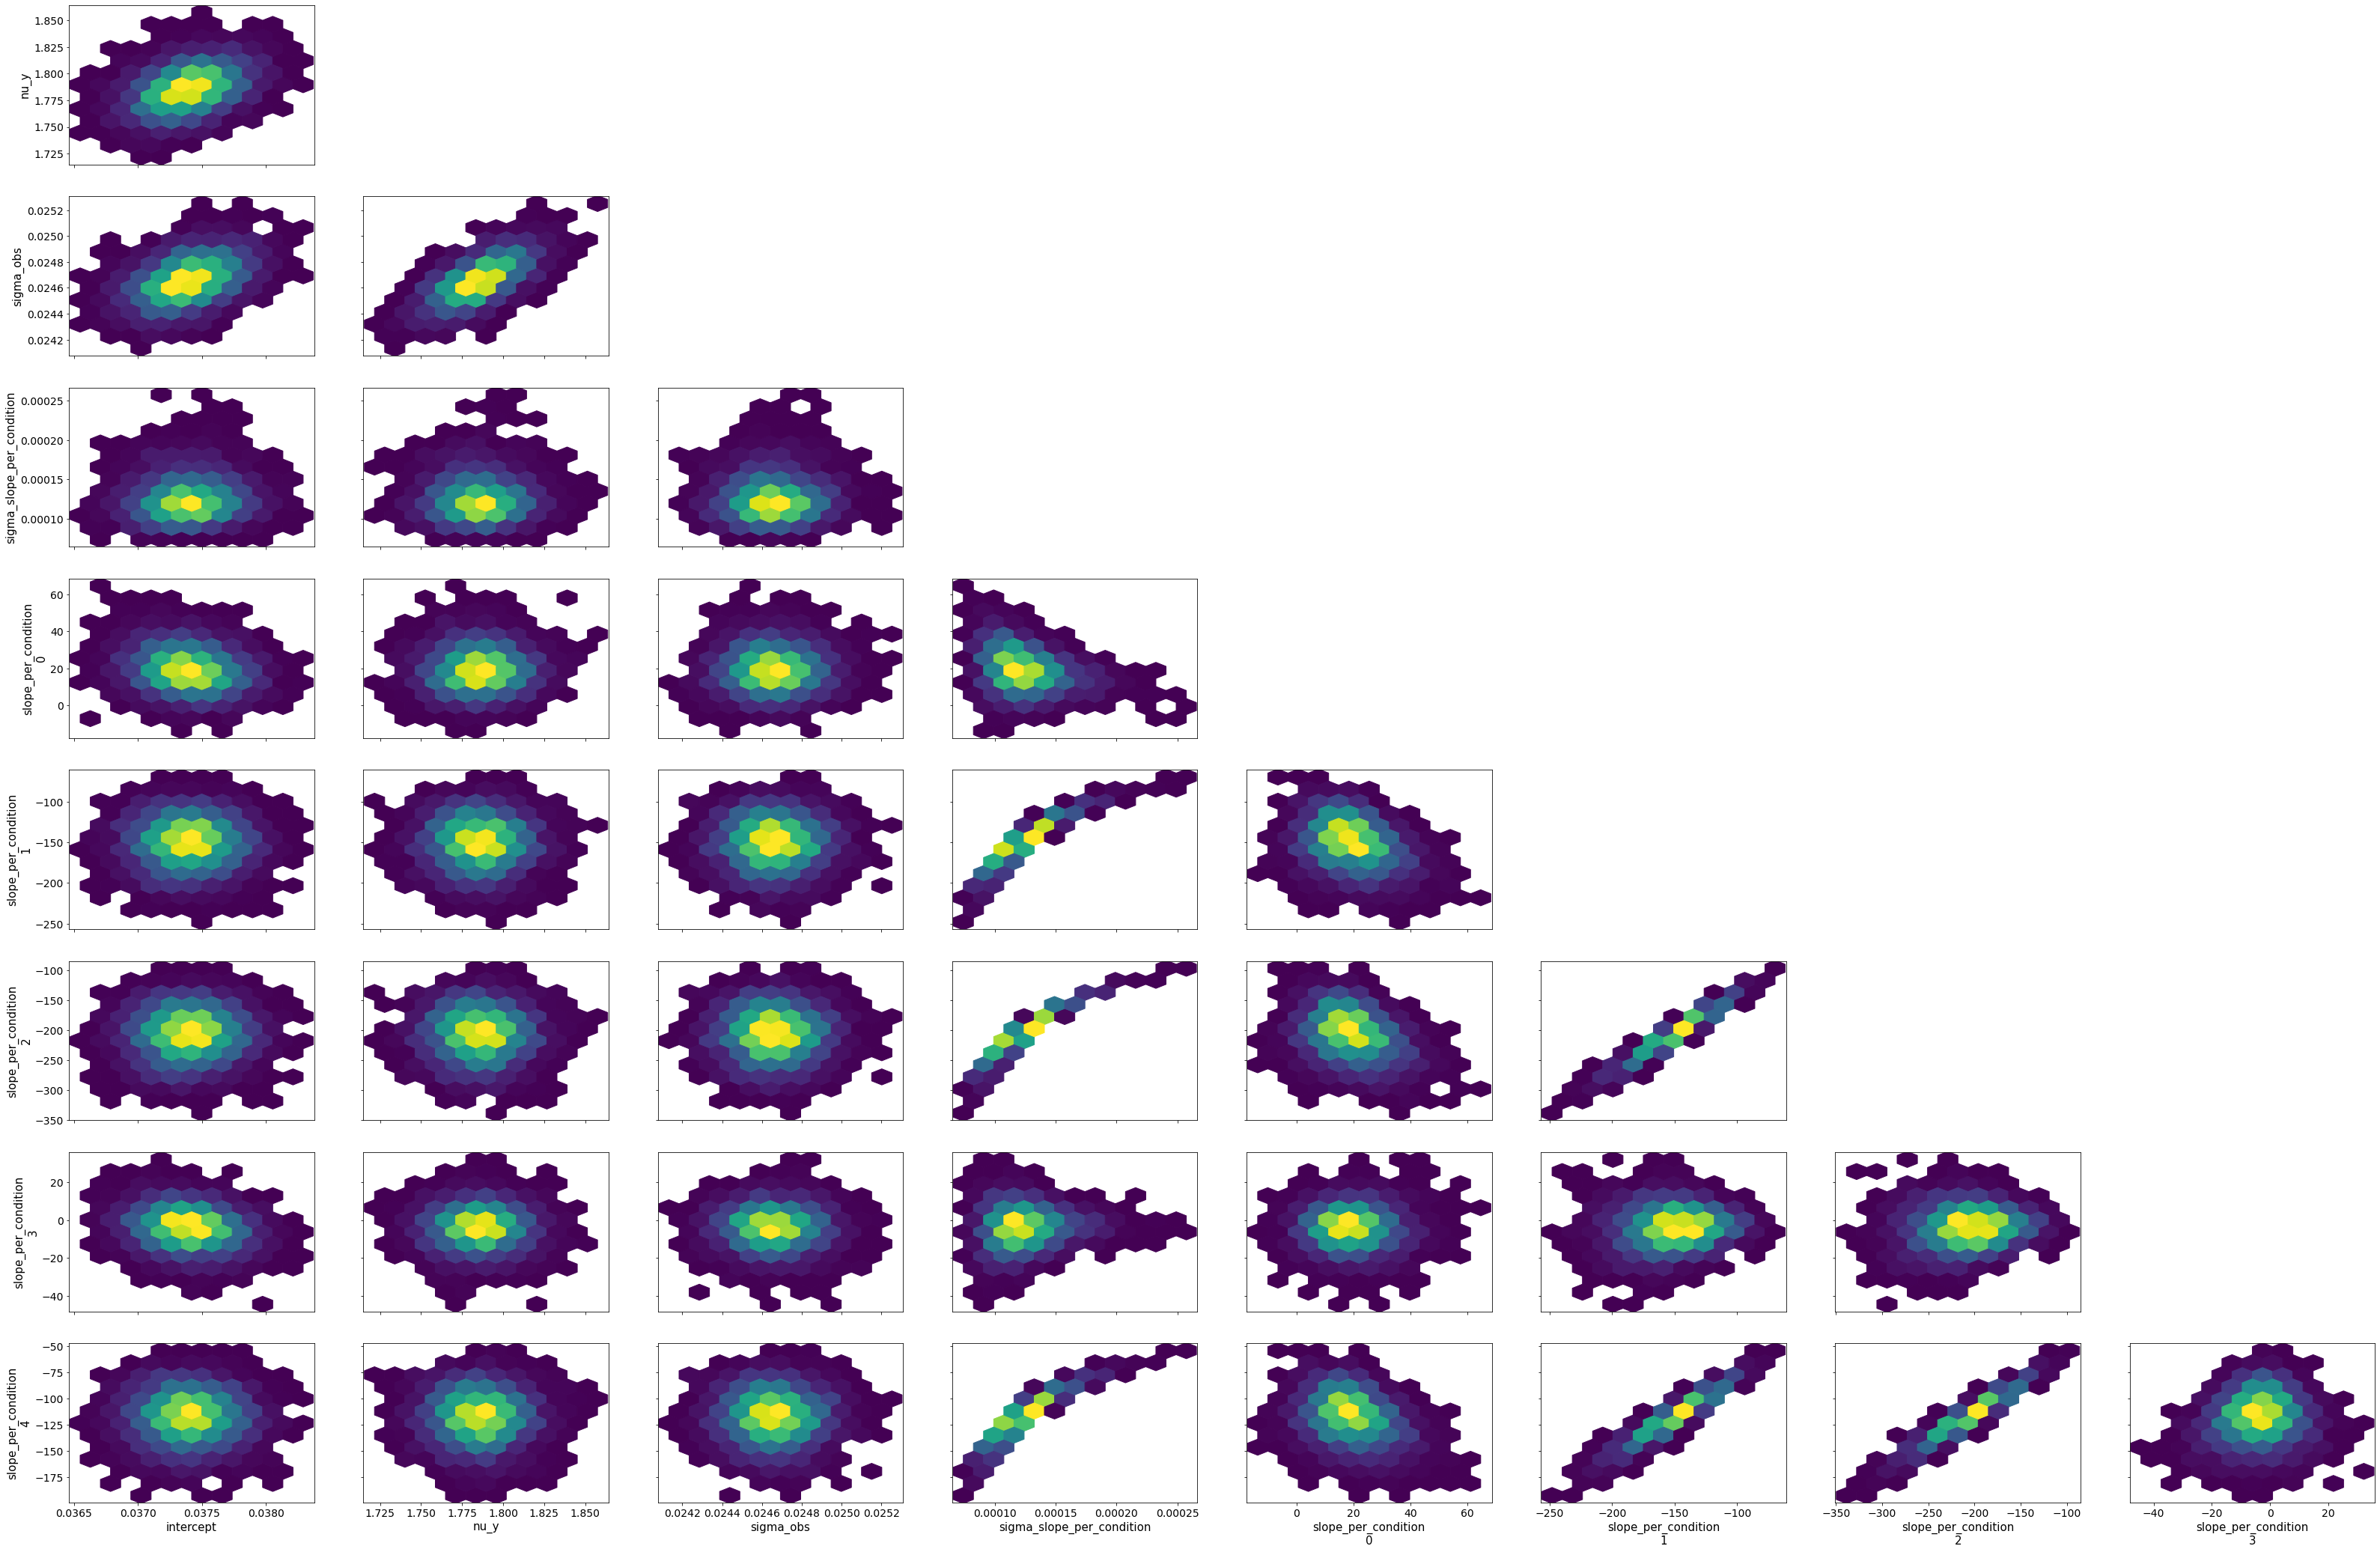

In [24]:
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=(models.model_hierarchical),
              progress_bar=True,
              do_make_change='subtract',
              dist_y='student',
              robust_slopes=False,
              add_group_intercept=False,
              add_group_slope=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot_model_quality()

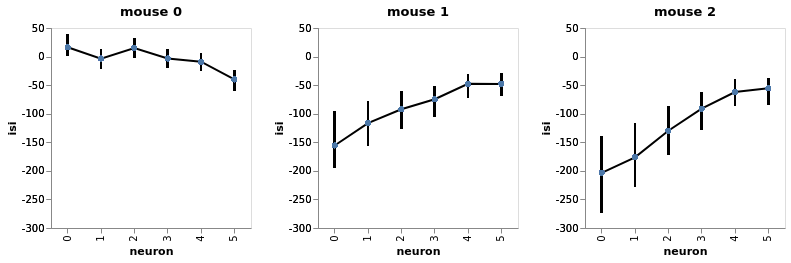

In [25]:

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

sample: 100%|██████████| 1500/1500 [30:19<00:00,  1.21s/it, 1023 steps of size 1.15e-02. acc. prob=0.95]


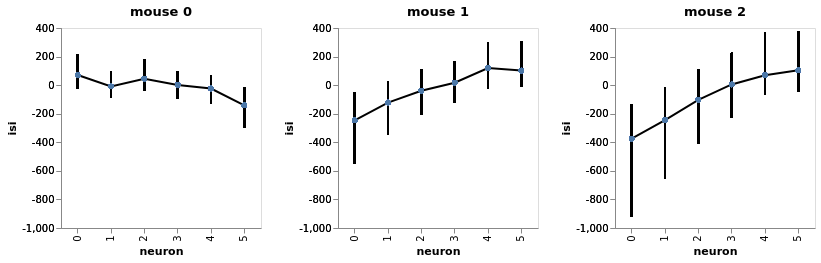

In [26]:

bw = BayesWindow(df_monster, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              progress_bar=True,
              dist_y='student',
              use_gpu=True,
              num_chains=1,
              num_warmup=500,
              add_group_slope=True, add_group_intercept=False,
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)
bw.facet(column='mouse',width=200,height=200).display()

#bw.explore_models(use_gpu=True)

## NUTS Lognormal 

sample: 100%|██████████| 3000/3000 [24:49<00:00,  2.01it/s, 255 steps of size 2.05e-02. acc. prob=0.88]  


n(Divergences) = 61


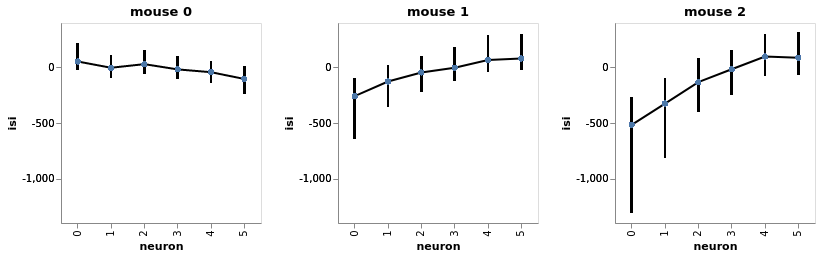

In [27]:
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              progress_bar=True,
              use_gpu=True, num_chains=1, n_draws=1500, num_warmup=1500,
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

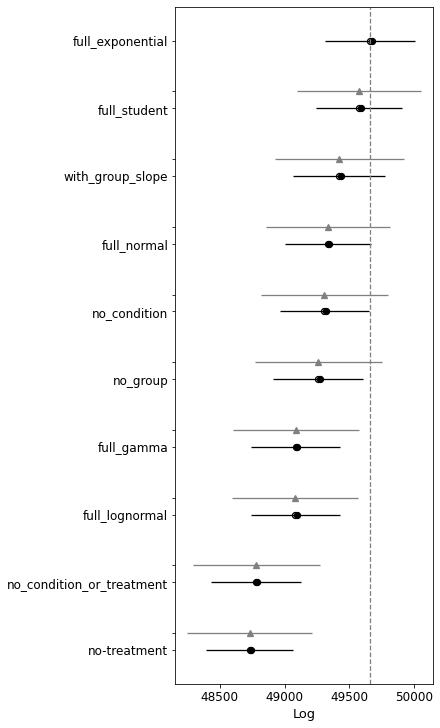

rank           loo      p_loo       d_loo  \
full_exponential              0  49660.118546  11.123897    0.000000   
full_student                  1  49575.226153  10.582729   84.892393   
with_group_slope              2  49420.509757  11.424781  239.608789   
full_normal                   3  49334.178206  10.079833  325.940340   
no_condition                  4  49305.844313   9.879511  354.274233   
no_group                      5  49259.045237  10.238619  401.073309   
full_gamma                    6  49084.997770  11.403203  575.120776   
full_lognormal                7  49080.679863  10.579633  579.438683   
no_condition_or_treatment     8  48778.656340   8.430143  881.462206   
no-treatment                  9  48728.474245   7.880707  931.644301   

                                 weight          se         dse  warning  \
full_exponential           1.896504e-01  345.257792    0.000000    False   
full_student               1.622920e-01  332.939277  479.013638    False   
with_group_slope           1.620319e-01  356.939675  497.400615    False   
full_normal                1.222825e-01  329.351647  476.470590    False   
no_condition               1.140549e-01  345.805986  488.590609    False   
no_group                   1.156132e-01  349.211274  491.479457    False   
full_gamma                 6.706513e-02  345.163452  488.075699    False   
full_lognormal             6.700998e-02  343.915398  486.827814    False   
no_condition_or_treatment  7.749200e-09  347.916807  490.178681    False   
no-treatment               0.000000e+00  337.324641  483.000358    False   

                          loo_scale  
full_exponential                log  
full_student                    log  
with_group_slope                log  
full_normal                     log  
no_condition                    log  
no_group                        log  
full_gamma                      log  
full_lognormal                  log  
no_condition_or_treatment       log  
no-treatment                    log

In [28]:
bw.explore_models(add_group_slope=True)

## BarkerMH

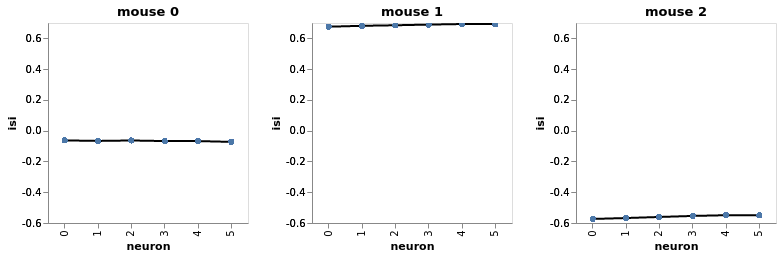

CPU times: user 41.7 s, sys: 2.61 s, total: 44.3 s
Wall time: 1min 8s


In [29]:
%%time
from bayes_window import fitting

from importlib import reload
reload(fitting)

bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              sampler=numpyro.infer.BarkerMH,
#               progress_bar=True,
              use_gpu=False, num_chains=1, n_draws=5000, num_warmup=3000,
              dist_y='student',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_numpyro,
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

## Fit using SVI

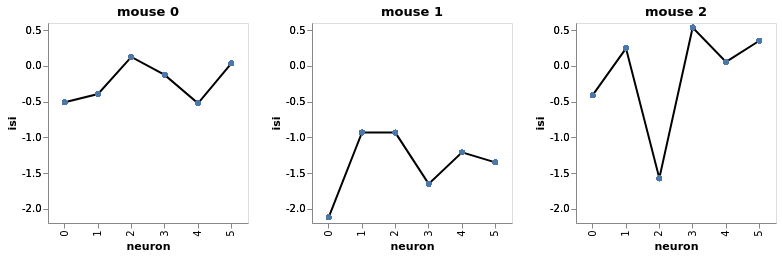

CPU times: user 1min 51s, sys: 4.54 s, total: 1min 56s
Wall time: 1min 18s


In [30]:
%%time
from bayes_window import fitting
from importlib import reload
reload(fitting)
reload(models)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              n_draws=5000,
              dist_y='gamma',
              add_group_slope=True, add_group_intercept=False,
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

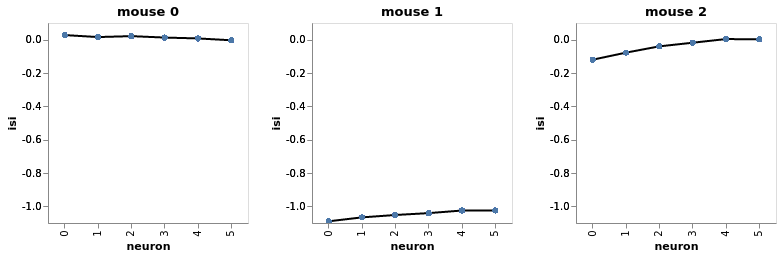

CPU times: user 2min 6s, sys: 37.5 s, total: 2min 44s
Wall time: 3min 6s


In [31]:
%%time
from bayes_window import fitting
import numpyro
from importlib import reload
reload(fitting)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              
            autoguide=numpyro.infer.autoguide.AutoLaplaceApproximation, 
            optim=numpyro.optim.Adam(step_size=0.0005),
            loss=numpyro.infer.Trace_ELBO(), 
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=True, 
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,

              n_draws=int(1e5),
              num_warmup=int(1e5),
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

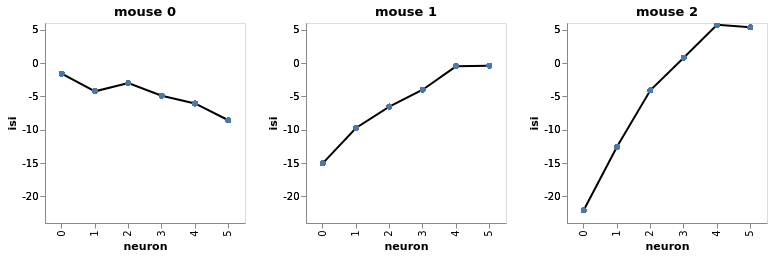

CPU times: user 1min 27s, sys: 6.67 s, total: 1min 34s
Wall time: 1min 52s


In [32]:
%%time 
from bayes_window import fitting
import numpyro
from importlib import reload
reload(fitting)
#numpyro.enable_validation(False)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              #use_gpu=True,
            autoguide=numpyro.infer.autoguide.AutoLaplaceApproximation, 
            optim=numpyro.optim.Adam(1),
            loss=numpyro.infer.Trace_ELBO(), 
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,
              #progress_bar=False,
              n_draws=int(1e5),
              num_warmup=int(1e5),
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

Pretty model

In [33]:
reload(models)
bw = BayesWindow(df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.reparam_model(models.model_hierarchical_for_render), do_make_change='subtract',
              progress_bar=True,
              use_gpu=False, num_chains=1, n_draws=1500, num_warmup=1500,
              dist_y='normal',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

sample: 100%|██████████| 3000/3000 [00:41<00:00, 72.82it/s, 1023 steps of size 1.19e-03. acc. prob=0.89] 


n(Divergences) = 1


NameError: Unhandled dimension Index(['a_group_dim_0', 'b_group_dim_0'], dtype='object')

In [ ]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hierarchical_for_render, model_args=(1, 1, 1, 1, 
                                                    'gamma', True,
                                                    True),
             render_distributions=True)

In [ ]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hierarchical_for_render, model_args=(1, 1, 1, 1, 
                                                    'gamma', True,
                                                    False),
             render_distributions=True)

In [ ]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hier_stim_one_codition, model_args=(1, 1, 1,  
                                                    'gamma', 
                                                    ),
             render_distributions=True)